<a href="https://colab.research.google.com/github/shriyan44/lab-1-phase-2-shriyan44/blob/main/Copy_of_DATA_301_Lab_1A_Shriya_Nimmagadda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Distribution of First Digits

In this lab, you will explore the distribution of first digits in real data. For example, the first digits of the numbers 52, 30.8, and 0.07 are 5, 3, and 7 respectively. In this lab, you will investigate the question: how frequently does each digit 1-9 appear as the first digit of the number?

## Question 0

Make a prediction. 

1. Approximately what percentage of the values do you think will have a _first_ digit of 1? What percentage of the values do you think will have a first digit of 9?
2. Approximately what percentage of the values do you think will have a _last_ digit of 1? What percentage of the values do you think will have a last digit of 9?

(Don't worry about being wrong. You will earn full credit for any justified answer.)

I think the probability of 1 being the first number or 9 being the first number is both 11%, so around 11% of the values would have those numbers. I also think the probability of 1 being the last number or 9 being the last number is both 11%, so around 11% of the values would have those numbers. I don't know much about this stock index data set but it seems like stocks can be worth any price so each number out of 9 digits has an equal shot of appearing.  

## Question 1

The [S&P 500](https://en.wikipedia.org/wiki/S%26P_500_Index) is a stock index based on the market capitalizations of large companies that are publicly traded on the NYSE or NASDAQ. The CSV file (https://dlsun.github.io/pods/data/sp500.csv) contains data from February 1, 2018 about the stocks that comprise the S&P 500. We will investigate the first digit distributions of the variables in this data set.

Read in the S&P 500 data. What is the unit of observation in this data set? Is there a variable that is natural to use as the index? If so, set that variable to be the index. Once you are done, display the `DataFrame`.

In [2]:
import pandas as pd

data_dir = "http://dlsun.github.io/pods/data/"
df_sp = pd.read_csv(data_dir + "sp500.csv")
df_sp = df_sp.set_index("Name")
df_sp.head()



,date,open,close,volume
Name,,,,
AAL,2018-02-01,$54.00,$53.88,3623078
AAPL,2018-02-01,$167.16,$167.78,47230787
AAP,2018-02-01,$116.24,$117.29,760629
ABBV,2018-02-01,$112.24,$116.34,9943452
ABC,2018-02-01,$97.74,$99.29,2786798


The unit of observation is a company's stock, where the most natural variable to use as the index is the stock name since it is unique.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Question 2

We will start by looking at the `volume` column. This variable tells us how many shares were traded on that date.

Extract the first digit of every value in this column. (_Hint:_ First, turn the numbers into strings. Then, use the [text processing functionalities](https://pandas.pydata.org/pandas-docs/stable/text.html) of `pandas` to extract the first character of each string.) Make an appropriate visualization to display the distribution of the first digits. (_Hint:_ Think carefully about whether the variable you are plotting is quantitative or categorical.)

How does this compare with what you predicted in Question 0?

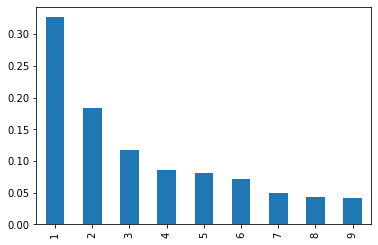

In [3]:
df_sp["volume"].astype("string").str[0].value_counts(normalize=True).plot.bar()


My predicition is very off, 1 shows up a lot more than any other digit at 32%  and there is a decreasing proportion as the first number increases.

## Question 3

Now, repeat Question 2, but for the distribution of _last_ digits. Again, make an appropriate visualization and compare with your prediction in Question 0.

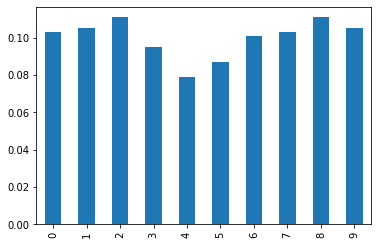

In [8]:
df_sp["lastdig"] = df_sp["volume"].astype("str").str[-1]
df_sp["lastdig"].value_counts(normalize=True).sort_index().plot.bar()

I prdicted that the probability of 1 and 9 showing up in the last number is 11% which seems kinds of close looking at this graph since 1 seems to be 10.50% and 9 is also 10.50&. Interesting enough there seems to be no pattern with the probabilities for last numbers. 2 and 8 are the last numbers that show up most and and 4 shows up the least.

## Question 4

Maybe the `volume` column was just a fluke. Let's see if the first digit distribution holds up when we look at a very different variable: the closing price of the stock. Make a visualization of the first digit distribution of the closing price (the `close` column of the `DataFrame`). Comment on what you see.

(_Hint:_ What type did `pandas` infer this variable as and why? You will have to first clean the values using the [text processing functionalities](https://pandas.pydata.org/pandas-docs/stable/text.html) of `pandas` and then convert this variable to a quantitative variable.)

count        505
unique       498
top       $80.62
freq           2
Name: close, dtype: object

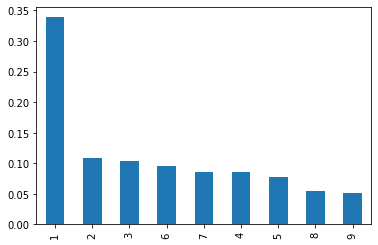

In [9]:
df_sp["close"].astype("string").str[1].value_counts(normalize=True).plot.bar()

df_sp["close"].describe()


Pandas predicted this variable as an object because of the dollar sign at the beginning. This sign isn't a number, and is therefore interpreted as an object, making the rest of the value an object as well. As for the distribution of digits 1-9 as a first digit in the close column, the number one appears about the same amount as it did in the volume column, only differing by about 1%.